In [106]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

import achiralqw as aqw
import scipy.sparse as sparse

from achiralqw.graph import QWGraph, QWGraphBuilder as qwgb
from achiralqw.plotter import plot_qwgraph
from achiralqw.collection import CachedQWGraphCollection

from achiralqw.article import * 

In [113]:
N= 20

smat = sparse.dok_matrix((N,N), dtype = "complex")
ring = sparse.identity(N, dtype = "complex", format = "dok")*4

In [114]:
print(smat[0,0])
print(ring[3,3])

ring.shape[1]

0j
(4+0j)


20

In [115]:
for i in range(N):
    ring[i,(i+1)%N] = complex(-1)
    ring[(i+1)%N,i] = complex(-1)

In [116]:
print(ring.get_shape())
print(ring.todense())

(20, 20)
[[ 4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j -1.+0.j]
 [-1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.

In [117]:
sval, svec = sparse.linalg.eigsh(ring, k = N-2)
val, vec = np.linalg.eigh(ring.todense())

print(val)
print(sval)

np.reshape(sval, (N-2,1))

[2.         2.09788697 2.09788697 2.38196601 2.38196601 2.8244295
 2.8244295  3.38196601 3.38196601 4.         4.         4.61803399
 4.61803399 5.1755705  5.1755705  5.61803399 5.61803399 5.90211303
 5.90211303 6.        ]
[6.         5.90211303 5.61803399 5.1755705  4.61803399 4.
 3.38196601 2.09788697 2.38196601 2.8244295  2.38196601 2.8244295
 3.38196601 5.90211303 5.61803399 4.         4.61803399 5.1755705 ]


array([[6.        ],
       [5.90211303],
       [5.61803399],
       [5.1755705 ],
       [4.61803399],
       [4.        ],
       [3.38196601],
       [2.09788697],
       [2.38196601],
       [2.8244295 ],
       [2.38196601],
       [2.8244295 ],
       [3.38196601],
       [5.90211303],
       [5.61803399],
       [4.        ],
       [4.61803399],
       [5.1755705 ]])

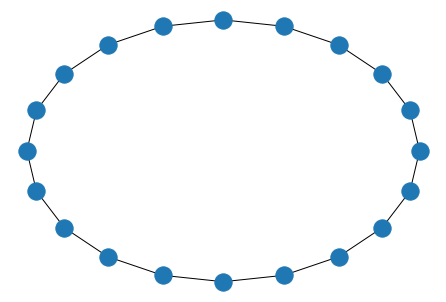

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [-1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.

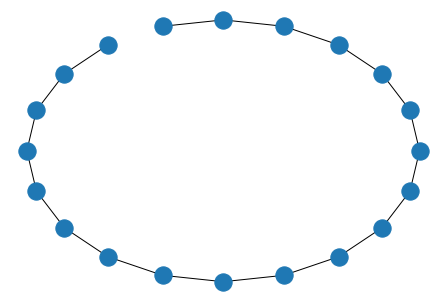

(1, 0)
(1, 2)
(3, 2)
(3, 4)
(4, 5)
(6, 5)
(8, 7)
(9, 8)
(9, 10)
(10, 11)
(11, 12)
(12, 13)
(13, 14)
(14, 15)
(15, 16)
(16, 17)
(17, 18)
(19, 18)
(19, 0)


In [126]:
def to_adjacency(mat):
    
    out = sparse.dok_matrix(mat.shape, dtype = "int")
    
    for k in mat.keys():
        if k[0] != k[1]:
            out[k] = 1
            
    return out
        
mat = to_adjacency(ring)
nx.draw_kamada_kawai(nx.from_numpy_matrix(mat.todense()))
plt.show()


mst = sparse.csgraph.minimum_spanning_tree(ring).todok()
print(mst.todense())
nx.draw_circular(nx.from_numpy_matrix(mst.todense()))
plt.show()
for edge in ring.keys():
    if abs(mst[edge]) > 1e-6 :
        print(edge)
        
        
        


[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


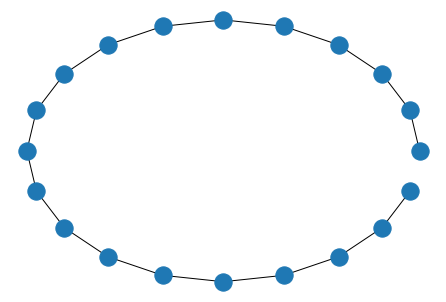

(19, 0)


In [142]:
def sparse_mst( smat ):
    #do it yourself implementation of kruskal algorithm for a 01 adjacency matrix
    #suited for dok matrices
    
    #union find parent list
    par = np.arange(0,smat.shape[0])
    
    out = sparse.dok_matrix(smat.shape, dtype = "int")
    
    #primitives for union-find
    def same(a,b) ->bool :
        
        p1 = par[a]
        while p1 != par[p1] :
            p1 = par[p1]
            par[a] = p1
        
        p2 = par[b]
        while p2 != par[p2] :
            p2 = par[p2]
            par[b] = p2
            
        #print( "same {} {}\t".format(a,b), par)
        return p1 == p2
        
    def join(a,b) -> None :
        
        p1 = par[a]
        while p1 != par[p1] :
            p1 = par[p1]
            par[a] = p1
        
        p2 = par[b]
        while p2 != par[p2] :
            p2 = par[p2]
            par[b] = p2
            
        par[p2] = p1
        
    for edge in smat.keys():
        if not same(edge[0], edge[1]):
            join(edge[0], edge[1])
            out[edge] = 1
            out[edge[1],edge[0]] = 1
            
    return out

my_mst = sparse_mst(ring)
print(my_mst.todense())
nx.draw_circular(nx.from_numpy_matrix(my_mst.todense()))
plt.show()

for edge in ring.keys():
    if edge[0] > edge[1] and my_mst[edge] == 0 :
        print(edge)
    

In [146]:
a = my_mst

sparse.csgraph.shortest_path(a, method = "D", directed = False, unweighted= True, indices = 3)

array([ 3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.,
       10., 11., 12., 13., 14., 15., 16.])

In [71]:
target = 6

print( ring[:,[0,7]])
print( ring.todense()[:,[0,7]])
    
ring[:,[0,7]] = ring[:,[7, 0]]

print( ring[:,[0,7]])
print( ring.todense()[:,[0,7]])

print(ring.todense())

  (0, 0)	(-1+0j)
  (0, 1)	(4+0j)
  (1, 1)	(-1+0j)
  (6, 0)	(-1+0j)
  (7, 0)	(4+0j)
  (7, 1)	(-1+0j)
[[-1.+0.j  4.+0.j]
 [ 0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j]
 [ 4.+0.j -1.+0.j]]
  (0, 0)	(4+0j)
  (0, 1)	(-1+0j)
  (1, 0)	(-1+0j)
  (6, 1)	(-1+0j)
  (7, 0)	(-1+0j)
  (7, 1)	(4+0j)
[[ 4.+0.j -1.+0.j]
 [-1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]
 [-1.+0.j  4.+0.j]]
[[ 4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [-1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  4.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  4.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  4.+0.j -1.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j